Etapa 1: Remova as linhas duplicadas

In [2]:
%pip install pandas;
%pip install matplotlib;
%pip install seaborn;

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 904.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('googleplaystore.csv') #Carregar DataSet

# Verificar o número de linhas antes de remover duplicatas
print("Número de linhas antes de remover duplicatas:", df.shape[0])

# Remover as linhas duplicadas
df_cleaned = df.drop_duplicates()

# Verificar o número de linhas após remover duplicatas
print("Número de linhas após remover duplicatas:", df_cleaned.shape[0])

# Exibir as primeiras linhas do dataset limpo
df_cleaned.head()

Número de linhas antes de remover duplicatas: 10841
Número de linhas após remover duplicatas: 10358


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Etapa 2: Um grafico de barras contendo os tops 5 apps por número de instalação

/tmp/ipykernel_10272/1952767910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs'] = df_cleaned['Installs'].astype(str)
/tmp/ipykernel_10272/1952767910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs'] = df_cleaned['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False)


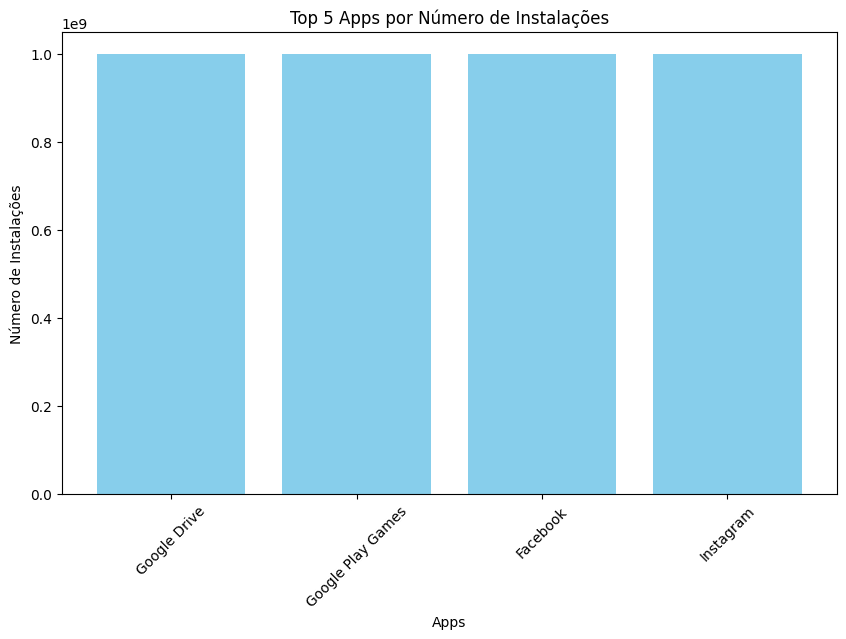

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que a coluna 'Installs' é do tipo string
df_cleaned['Installs'] = df_cleaned['Installs'].astype(str)

# Limpar a coluna 'Installs', removendo caracteres não numéricos
df_cleaned['Installs'] = df_cleaned['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False)

# Filtrar apenas linhas onde 'Installs' contém valores numéricos válidos
df_cleaned = df_cleaned[df_cleaned['Installs'].str.isdigit()]

# Converter a coluna 'Installs' para inteiros
df_cleaned['Installs'] = df_cleaned['Installs'].astype(int)

# Ordenar pelo número de instalações e selecionar os 5 primeiros
top_5_apps = df_cleaned.sort_values(by='Installs', ascending=False).head(5)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Apps por Número de Instalações')
plt.xticks(rotation=45)
plt.show()

Etapa 3: Um gráfico de pizza (pie chart) mostrando as categorias de apps  existentes no dataset de acordo com a frequencia em que elas aparecem

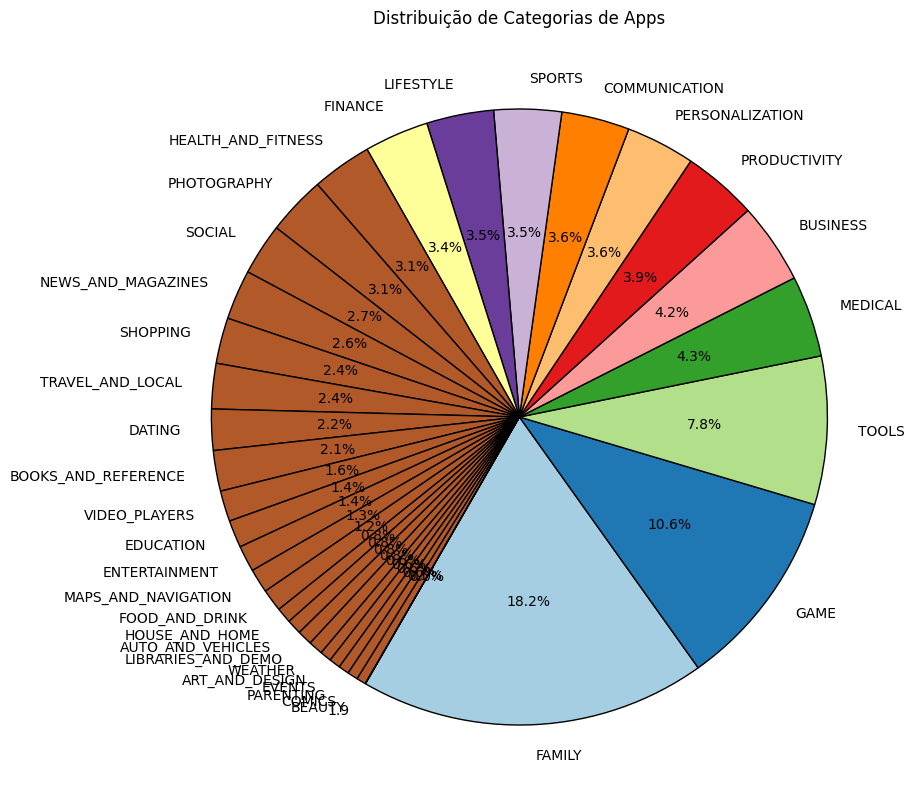

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o dataset 
df = pd.read_csv('googleplaystore.csv')

# Contar a frequência de cada categoria
category_counts = df['Category'].value_counts()

# Explodir a maior fatia para melhorar a visualização
explode = [0.2] * len(category_counts)
# Ajustar a fatia que deve ser destacada, se necessário
# explode[0] = 0.2  # Destaque a maior fatia

# Criar o gráfico de pizza com ajustes de layout
plt.figure(figsize=(14, 10)) # Aumenta ainda mais o tamanho da figura
plt.pie(category_counts, # plt.pie Cria o gráfico de pizza com as contagens de categorias
        labels=category_counts.index, 
        autopct='%1.1f%%', # Mostra as porcentagens de cada fatia no gráfico
        colors=plt.cm.Paired(range(len(category_counts))),# Adiciona cores diferenciadas para cada fatia
        wedgeprops={'edgecolor': 'black'},  # Adiciona borda preta para cada fatia
        startangle=240)  # Ajusta o ângulo inicial para melhor distribuição) 
plt.title('Distribuição de Categorias de Apps')
plt.show()

Etapa 4: Mostre qual o app mais caro existente no dataset

In [6]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('googleplaystore.csv')

# Limpar a coluna 'Price

# Limpar a coluna 'Price' e converter para numérico, forçando a conversão de valores inválidos para NaN
df['Price'] = pd.to_numeric(df['Price'].replace(r'[$,]', '', regex=True), errors='coerce') # replace(r'[$,]', '', regex=True) remove os símbolos de dólar e vírgulas 
# pd.to_numeric(..., errors='coerce') converte os valores para float, substituindo entradas inválidas por NaN.

# Remover linhas onde o preço é NaN
df_cleaned = df.dropna(subset=['Price'])

# Encontrar o aplicativo mais caro
max_price_app = df_cleaned.loc[df_cleaned['Price'].idxmax()]

# Mostrar o aplicativo mais caro
# Exibe o nome
# Categoria e preço do aplicativo mais caro
print(f"Aplicativo mais caro:\n")
print(f"Nome: {max_price_app['App']}")
print(f"Categoria: {max_price_app['Category']}")
print(f"Preço: {max_price_app['Price']:.2f}")

Aplicativo mais caro:

Nome: I'm Rich - Trump Edition
Categoria: LIFESTYLE
Preço: 400.00


Etapa 5: Mostre quanto apps são classificados como 'Mature 17+'

In [7]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('googleplaystore.csv')

# Contar o número de aplicativos classificados como 'Mature 17+' 
mature_17_plus_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]  
# Filtra o DataFrame para manter apenas as linhas onde a coluna 'Content Rating' é igual a 'Mature 17+'
# .shape[0] Obtém o número de linhas no DataFrame filtrado, que corresponde ao número de aplicativos com a classificação 'Mature 17+'.

print(f"Número de aplicativos classificados como 'Mature 17+': {mature_17_plus_count}")

Número de aplicativos classificados como 'Mature 17+': 499


Etapa 6: Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews

In [8]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('googleplaystore.csv')

# Limpar e converter a coluna 'Reviews' para numérico
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ordenar os aplicativos pelo número de reviews em ordem decrescente e selecionar os 10 primeiros
top_10_reviews = df.sort_values(by='Reviews', ascending=False).head(10)

# Mostrar o resultado
print(top_10_reviews[['App', 'Reviews']])

                                           App     Reviews
2544                                  Facebook  78158306.0
3943                                  Facebook  78128208.0
381                         WhatsApp Messenger  69119316.0
336                         WhatsApp Messenger  69119316.0
3904                        WhatsApp Messenger  69109672.0
2604                                 Instagram  66577446.0
2611                                 Instagram  66577313.0
2545                                 Instagram  66577313.0
3909                                 Instagram  66509917.0
382   Messenger – Text and Video Chat for Free  56646578.0


Etapa 7: Crie pelo menos mais dois cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor

In [9]:
# 1: 10 categorias com mais aplicativos

# Contar o número de aplicativos em cada categoria
category_counts = df['Category'].value_counts()

# Selecionar as 10 categorias com mais aplicativos
top_10_categories = category_counts.head(10)

# Exibir a lista
print("Top 10 Categorias de Apps com Mais Aplicativos")
for category, count in top_10_categories.items():
    print(f"{category}: {count} aplicativos")


Top 10 Categorias de Apps com Mais Aplicativos
FAMILY: 1972 aplicativos
GAME: 1144 aplicativos
TOOLS: 843 aplicativos
MEDICAL: 463 aplicativos
BUSINESS: 460 aplicativos
PRODUCTIVITY: 424 aplicativos
PERSONALIZATION: 392 aplicativos
COMMUNICATION: 387 aplicativos
SPORTS: 384 aplicativos
LIFESTYLE: 382 aplicativos


In [10]:
# 2: Média de Avaliações (Ratings) dos Apps

# Converter a coluna 'Rating' para float (se ainda não estiver)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calcular a média das avaliações
average_rating = df['Rating'].mean()

print(f"A média das avaliações dos aplicativos é: {average_rating:.2f}")


A média das avaliações dos aplicativos é: 4.19


Etapa 8: Crie pelo menos outras duas formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib (linhas e dispersão)

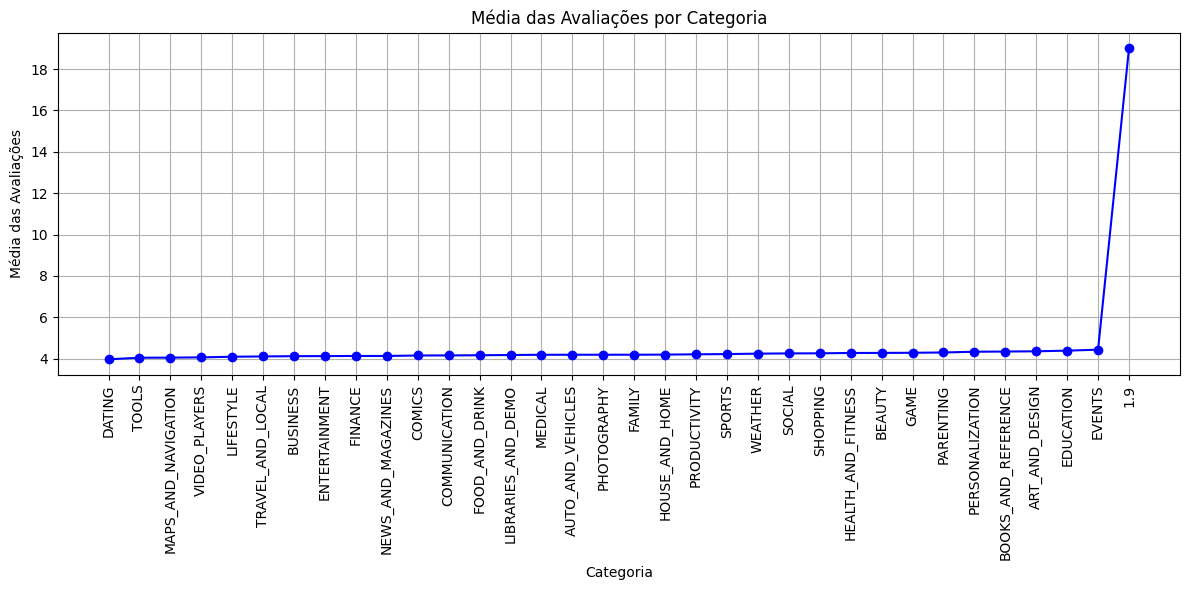

In [11]:
# Gráfico de Linha: Média das Avaliações
import matplotlib.pyplot as plt

# Calcular a média das avaliações por categoria
avg_ratings_by_category = df.groupby('Category')['Rating'].mean().sort_values()

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(avg_ratings_by_category.index, avg_ratings_by_category.values, marker='o', linestyle='-', color='b')
plt.title('Média das Avaliações por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média das Avaliações')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig('media_avaliacoes_por_categoria.png')  # Salvar o gráfico como um arquivo PNG
plt.show()

# É útil para observar como as avaliações médias variam entre as categorias de aplicativo

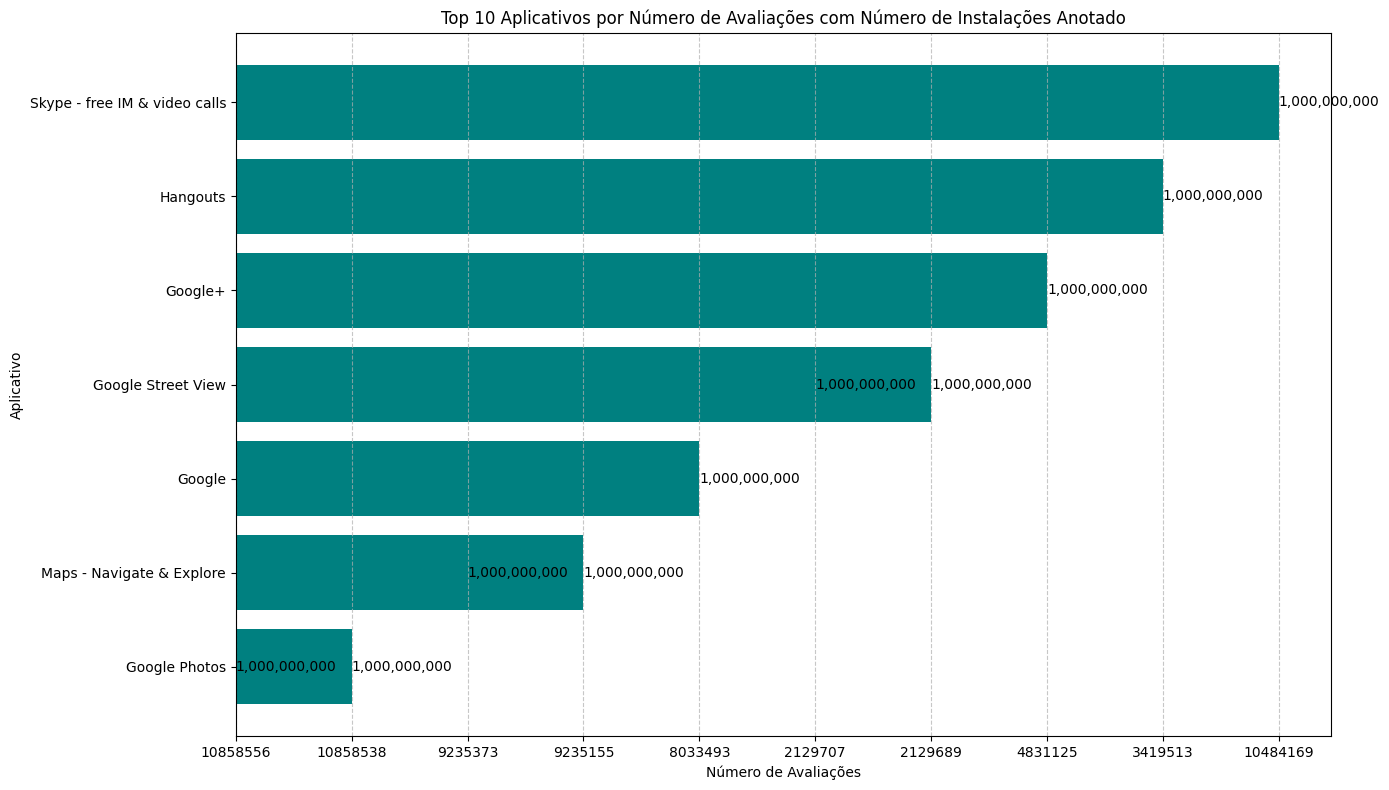

In [12]:
# Gŕafico de Barras Horizontais: Número de Instalações vs Número de Avaliações

import matplotlib.pyplot as plt

# Limpar e converter as colunas 'Installs' e 'Reviews'
df_cleaned['Installs'] = df_cleaned['Installs'].replace(r'[,\+]', '', regex=True).astype(float) 
# Remove caracteres como vírgulas e sinais de mais da coluna 'Installs', usando regex=true com .astype converte a coluna resultante pro tipo float pros valores serem usado em cálculos/gráficos

# Selecionar os 10 aplicativos com mais instalações
top_10_installs_reviews = df_cleaned[['App', 'Installs', 'Reviews']].sort_values(by='Installs', ascending=False).head(10) 
# Seleciona as colunas relevantes
# v.sort_values(by='Installs', ascending=False): Ordena os aplicativos pelo número de instalações de forma decrescente
# .head(10): Seleciona os 10 aplicativos com o maior número de instalações.

# Criar o gráfico de barras horizontais para Número de Avaliações
plt.figure(figsize=(14, 8)) # Define o tamanho da figura em polegadas (largura e altura)
bars = plt.barh(top_10_installs_reviews['App'], top_10_installs_reviews['Reviews'], color='teal') 
# plt.barth Criar Gráfico de Barras Horizontais
# top_10_installs_reviews['App'] Define as etiquetas do eixo y (nomes dos aplicativos)
# '' ['Reviews']: Define os valores das barras (número de avaliações)
# E define a cor das barras

# Adicionar números de Instalações como anotação nas barras
for bar, installs in zip(bars, top_10_installs_reviews['Installs']): # Cria um iterador que combina as barras do gráfico e o número de instalações
    # Posição horizontal e vertical do texto (no centro e no final da barra)
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(installs):,}', # o f'(int(installs) Formata o número de instalações com separadores de milhar
             va='center', ha='left', color='black', fontsize=10) # Alinha verticalmente o texto ao centro e horizontalmente à esquerda  define a cor do texto e define o tamanho da fonte

plt.title('Top 10 Aplicativos por Número de Avaliações com Número de Instalações Anotado') #Título do Gráfico
plt.xlabel('Número de Avaliações') # Definir rótulos dos eixos x e y
plt.ylabel('Aplicativo') 
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adiciona linha de grade horizontal no eixo x, com estilo de linha tracejada e opacidade de 0.7
plt.tight_layout() # Ajusta o layout do gráfico pra evitar sobreposição e garante que tudo fique visível
plt.savefig('top_10_avaliacoes_com_instalacoes.png')  # Salvar o gráfico como um arquivo PNG
plt.show() 


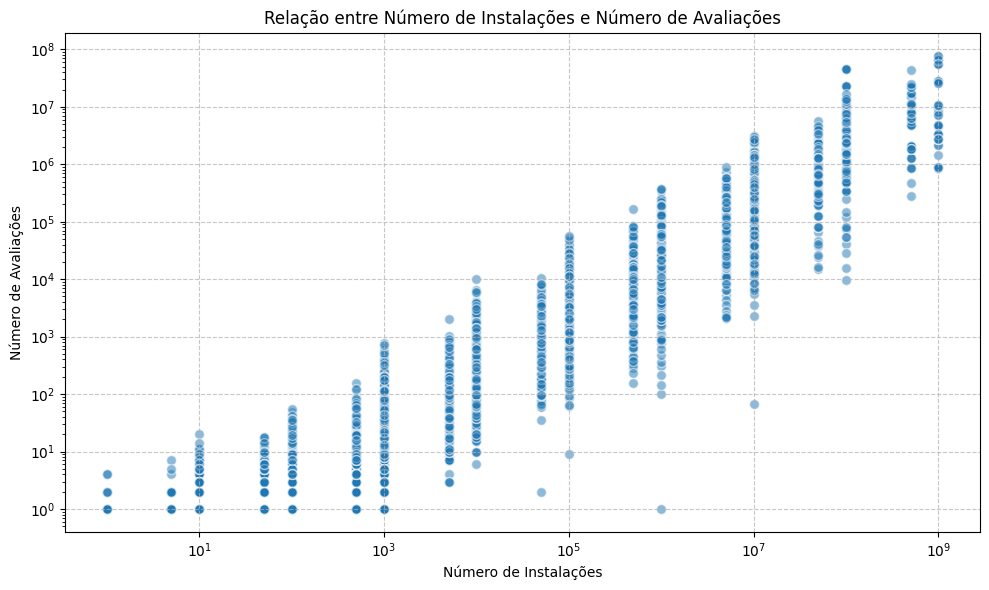

In [13]:
# Gŕafico de Dispersão: Número de Instalações vs Número de Avaliações

import matplotlib.pyplot as plt
import pandas as pd

# Limpar e converter a coluna 'Installs'
df_cleaned['Installs'] = df_cleaned['Installs'].replace(r'[,\+]', '', regex=True).astype(float)
# Remove caracteres como vírgulas e sinais de mais da coluna 'Installs', usando regex=true com .astype converte a coluna resultante pro tipo float pros valores serem usado em cálculos/gráficos

# Limpar e converter a coluna 'Reviews'
df_cleaned['Reviews'] = df_cleaned['Reviews'].astype(float)
# Converte a coluna 'Reviews' para o tipo float, assumindo que os dados já estão limpos.

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Installs'], df_cleaned['Reviews'], alpha=0.5, edgecolors='w', s=50)
plt.title('Relação entre Número de Instalações e Número de Avaliações')
plt.xlabel('Número de Instalações')
plt.ylabel('Número de Avaliações')
plt.xscale('log')  # Usar escala logarítmica para melhor visualização
plt.yscale('log')  # Usar escala logarítmica para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('relacao_instalacoes_avaliacoes.png')  # Salvar o gráfico como um arquivo PNG
plt.show()


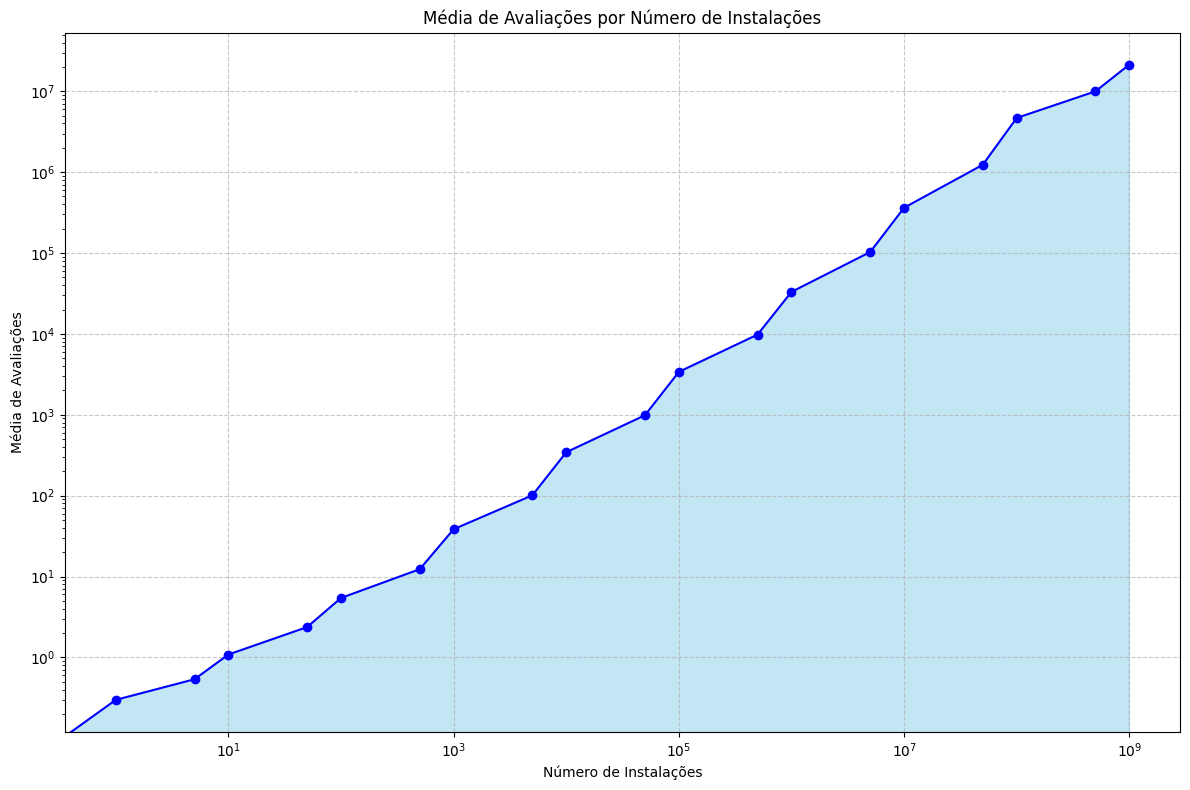

In [14]:
# Gráfico de Área: Número de Instalações vs Número de Avaliações

import matplotlib.pyplot as plt

# Limpar e converter a coluna 'Installs'
df_cleaned['Installs'] = df_cleaned['Installs'].replace(r'[,\+]', '', regex=True).astype(float)

# Limpar e converter a coluna 'Reviews'
df_cleaned['Reviews'] = df_cleaned['Reviews'].astype(float)

# Calcular a média de avaliações por número de instalações
avg_reviews_by_installs = df_cleaned.groupby('Installs')['Reviews'].mean()

# Criar o gráfico de área
plt.figure(figsize=(12, 8))
plt.fill_between(avg_reviews_by_installs.index, avg_reviews_by_installs.values, color='skyblue', alpha=0.5)
plt.plot(avg_reviews_by_installs.index, avg_reviews_by_installs.values, color='blue', marker='o')
plt.title('Média de Avaliações por Número de Instalações')
plt.xlabel('Número de Instalações')
plt.ylabel('Média de Avaliações')
plt.xscale('log')  # Usar escala logarítmica para melhor visualização
plt.yscale('log')  # Usar escala logarítmica para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('media_avaliacoes_por_instalacoes.png')  # Salvar o gráfico como um arquivo PNG
plt.show()


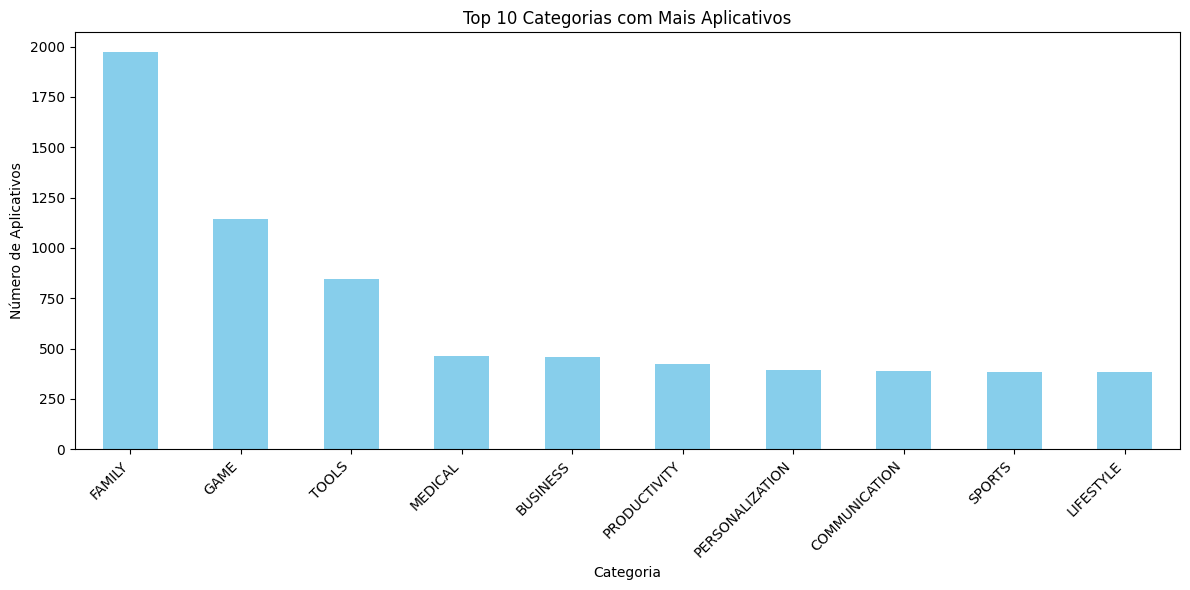

In [15]:
# Gráfico de Barras: Top 10 Categorias com mais aplicativos

import matplotlib.pyplot as plt
import pandas as pd

# Calcular o número de aplicativos por categoria
category_counts = df['Category'].value_counts() # e retorna uma série ordenada por frequência, com a categoria mais comum no topo

# Selecionar as 10 categorias com mais aplicativos
top_10_categories = category_counts.head(10) # head(10) retorna os 10 primeiros itens da Série ordenada por frequência

# Criar o gráfico de barras
plt.figure(figsize=(12, 6)) # Define o tamanho da figura em polegadas (largura e altura)
top_10_categories.plot(kind='bar', color='skyblue')
# kind='bar' Especifica que o tipo de gráfico a ser criado é um gráfico de barras
# color='skyblue' Define a cor das barras como azul-claro
plt.title('Top 10 Categorias com Mais Aplicativos') # Título do gráfico
plt.xlabel('Categoria') 
plt.ylabel('Número de Aplicativos') # Define os rótulos do eixo x e y
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x em 45 graus para a direita, assim melhora a legibilidade dos rótulos, especialmente quando são longos
plt.tight_layout() # Ajusta automaticamente os parâmetros do layout para garantir que o gráfico fique bem posicionado e visível
plt.savefig('top_10_categorias_barras.png')  # Salvar o gráfico como um arquivo PNG
plt.show() # Exibe o gráfico


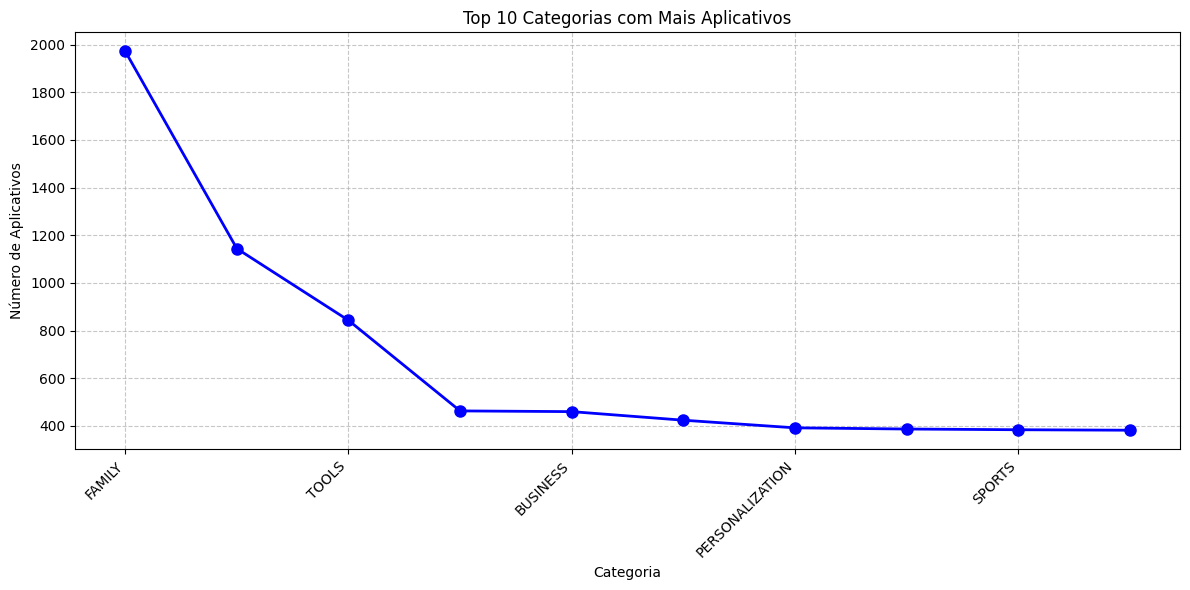

In [16]:
# Gráfico de Linhas: Top 10 Categorias com mais aplicativos
import matplotlib.pyplot as plt
import pandas as pd

# Calcular o número de aplicativos por categoria
category_counts = df['Category'].value_counts()

# Selecionar as 10 categorias com mais aplicativos
top_10_categories = category_counts.head(10)

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Top 10 Categorias com Mais Aplicativos')
plt.xlabel('Categoria')
plt.ylabel('Número de Aplicativos')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_categorias_linhas.png')  # Salvar o gráfico como um arquivo PNG
plt.show()


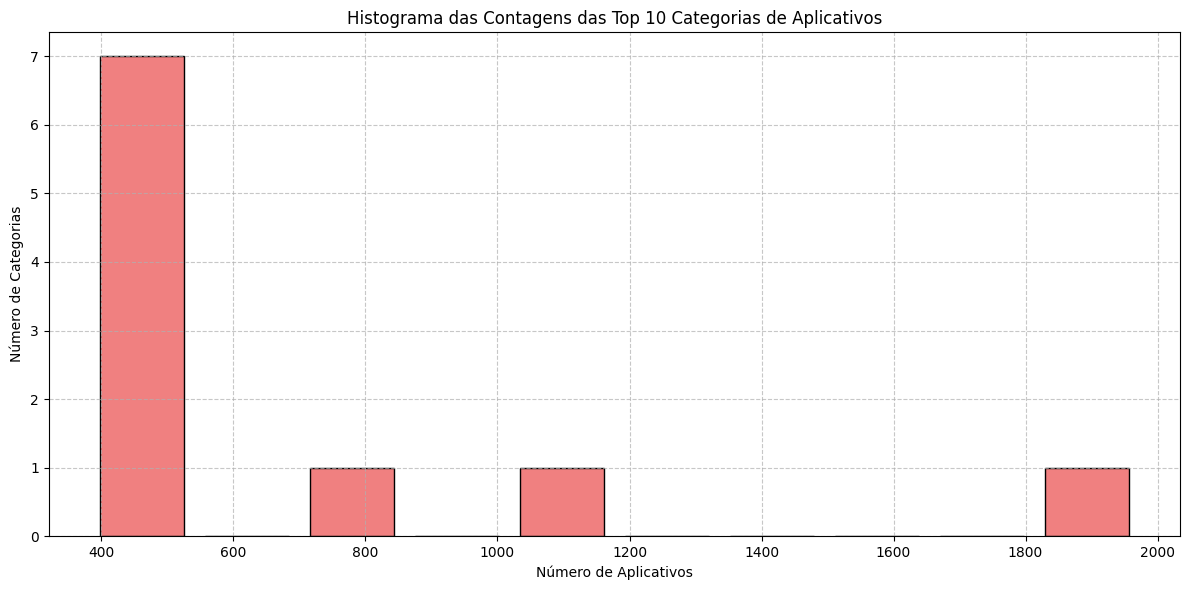

In [17]:
# Gráfico de Histograma: Top 10 Categorias com mais aplicativos

import matplotlib.pyplot as plt

# Contar o número de aplicativos em cada categoria
category_counts = df['Category'].value_counts()

# Selecionar as 10 categorias com mais aplicativos
top_10_categories = category_counts.head(10)

# Criar o histograma
plt.figure(figsize=(12, 6))
plt.hist(top_10_categories, bins=len(top_10_categories), color='lightcoral', edgecolor='black', rwidth=0.8)
plt.title('Histograma das Contagens das Top 10 Categorias de Aplicativos')
plt.xlabel('Número de Aplicativos')
plt.ylabel('Número de Categorias')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('histograma_top_10_categorias.png')  # Salvar o gráfico como um arquivo PNG
plt.show()
